In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\stagner\anaconda3\envs\bcs\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

koi_disposition  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
0       CONFIRMED              0              0              0              0   
1  FALSE POSITIVE              0              1              0              0   
2  FALSE POSITIVE              0              1              0              0   
3       CONFIRMED              0              0              0              0   
4       CONFIRMED              0              0              0              0   

   koi_period  koi_period_err1  koi_period_err2  koi_time0bk  \
0   54.418383     2.479000e-04    -2.479000e-04   162.513840   
1   19.899140     1.490000e-05    -1.490000e-05   175.850252   
2    1.736952     2.630000e-07    -2.630000e-07   170.307565   
3    2.525592     3.760000e-06    -3.760000e-06   171.595550   
4    4.134435     1.050000e-05    -1.050000e-05   172.979370   

   koi_time0bk_err1  ...  koi_steff_err2  koi_slogg  koi_slogg_err1  \
0          0.003520  ...             -81      4.467           0.064   
1          0.000581  ...            -176      4.544           0.044   
2          0.000115  ...            -174      4.564           0.053   
3          0.001130  ...            -211      4.438           0.070   
4          0.001900  ...            -232      4.486           0.054   

   koi_slogg_err2  koi_srad  koi_srad_err1  koi_srad_err2         ra  \
0          -0.096     0.927          0.105         -0.061  291.93423   
1          -0.176     0.868          0.233         -0.078  297.00482   
2          -0.168     0.791          0.201         -0.067  285.53461   
3          -0.210     1.046          0.334         -0.133  288.75488   
4          -0.229     0.972          0.315         -0.105  296.28613   

         dec  koi_kepmag  
0  48.141651      15.347  
1  48.134129      15.436  
2  48.285210      15.597  
3  48.226200      15.509  
4  48.224670      15.714  

[5 rows x 41 columns]

In [11]:
X = df.koi_period.values.reshape(-1, 1)
y = df.koi_disposition.astype('category')

print("Shape: ", X.shape, y.shape)
X

Shape:  (6991, 1) (6991,)


array([[54.4183827 ],
       [19.89913995],
       [ 1.73695245],
       ...,
       [ 1.73984941],
       [ 0.68140161],
       [ 4.85603482]])

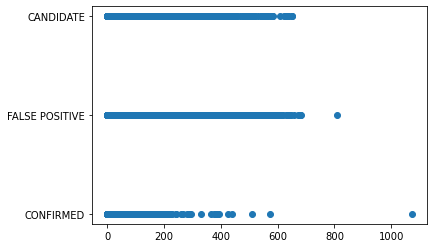

In [12]:
plt.scatter(X, y)

In [13]:
X = df.koi_time0bk.values.reshape(-1, 1)
y = df.koi_disposition.astype('category')

print("Shape: ", X.shape, y.shape)
X

Shape:  (6991, 1) (6991,)


array([[162.51384 ],
       [175.850252],
       [170.307565],
       ...,
       [133.00127 ],
       [132.18175 ],
       [135.9933  ]])

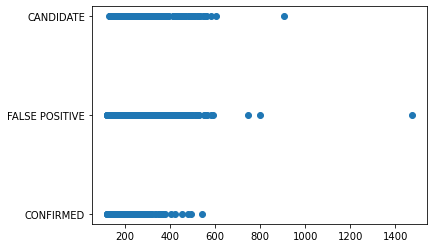

In [14]:
plt.scatter(X, y)

In [15]:
X = df.koi_slogg.values.reshape(-1, 1)
y = df.koi_disposition.astype('category')

print("Shape: ", X.shape, y.shape)
X

Shape:  (6991, 1) (6991,)


array([[4.467],
       [4.544],
       [4.564],
       ...,
       [4.444],
       [4.447],
       [4.385]])

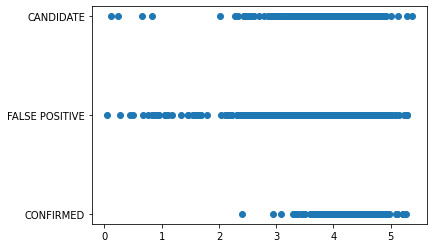

In [16]:
plt.scatter(X, y)

In [17]:
X = df.koi_srad.values.reshape(-1, 1)
y = df.koi_disposition.astype('category')

print("Shape: ", X.shape, y.shape)
X

Shape:  (6991, 1) (6991,)


array([[0.927],
       [0.868],
       [0.791],
       ...,
       [1.031],
       [1.041],
       [1.193]])

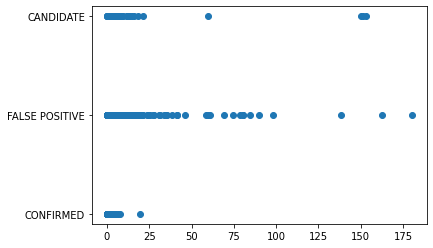

In [18]:
plt.scatter(X, y)

In [19]:
X = df.ra.values.reshape(-1, 1)
y = df.koi_disposition.astype('category')

print("Shape: ", X.shape, y.shape)
X

Shape:  (6991, 1) (6991,)


array([[291.93423],
       [297.00482],
       [285.53461],
       ...,
       [286.50937],
       [294.16489],
       [297.00977]])

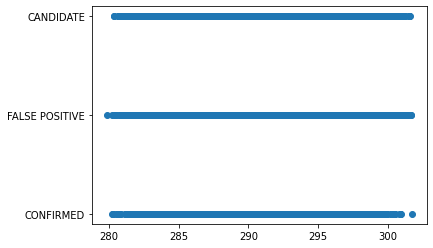

In [20]:
plt.scatter(X, y)

In [21]:
X = df.dec.values.reshape(-1, 1)
y = df.koi_disposition.astype('category')

print("Shape: ", X.shape, y.shape)
X

Shape:  (6991, 1) (6991,)


array([[48.141651],
       [48.134129],
       [48.28521 ],
       ...,
       [47.163219],
       [47.176281],
       [47.121021]])

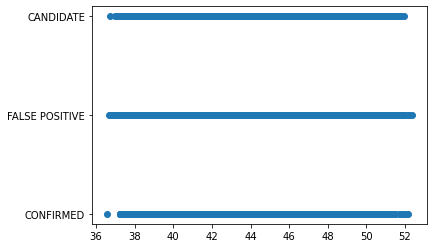

In [22]:
plt.scatter(X, y)

In [23]:
X = df.koi_kepmag.values.reshape(-1, 1)
y = df.koi_disposition.astype('category')

print("Shape: ", X.shape, y.shape)
X

Shape:  (6991, 1) (6991,)


array([[15.347],
       [15.436],
       [15.597],
       ...,
       [14.757],
       [15.385],
       [14.826]])

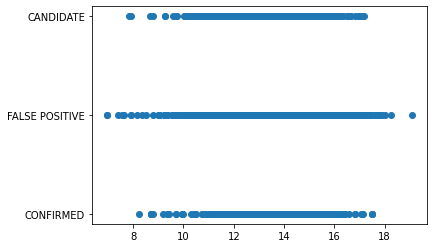

In [24]:
plt.scatter(X, y)

In [25]:
# Assign X (data) and y (target)
X = df.drop("koi_disposition", axis=1)
y = df["koi_disposition"]
print(X.shape, y.shape)

(6991, 40) (6991,)


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [32]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [33]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [34]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6170131604043486
Testing Data Score: 0.6287185354691075


# Select your features (columns)

In [ ]:
# Set features. This will also be used as your x values.
selected_features = df[['names', 'of', 'selected', 'features', 'here']]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [ ]:
X_train.head()

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [ ]:
# Scale your data

# Train the Model



In [ ]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)